# Basic Chess Game Analysis
This notebook demonstrates loading and exploring chess game data from PGN files.

In [26]:
# Import necessary libraries
import sys
sys.path.append('../Core')

from metadata import MetaData
from movedata import MoveData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 0. Diagnostic Cell

In [27]:
import os

# Check if file exists
pgn_path = '../Data/kaggle_sample.pgn'
print(f"File exists: {os.path.exists(pgn_path)}")

if os.path.exists(pgn_path):
    # Check file size
    file_size = os.path.getsize(pgn_path)
    print(f"File size: {file_size} bytes")
    
    # Read first few lines to verify content
    print("\nFirst 20 lines of file:")
    with open(pgn_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i < 20:
                print(f"{i+1}: {line.rstrip()}")
            else:
                break
else:
    print(f"File not found at: {os.path.abspath(pgn_path)}")
    print(f"Current working directory: {os.getcwd()}")

File exists: True
File size: 22729 bytes

First 20 lines of file:
1: [Event "Live Chess"]
2: [Site "Chess.com"]
3: [Date "2014.01.06"]
4: [Round "-"]
5: [White "Hikaru"]
6: [Black "Godswill"]
7: [Result "1-0"]
8: [CurrentPosition "6k1/1p2R3/p1p5/8/2P1B3/1P1P1p1P/P6K/8 b - -"]
9: [Timezone "UTC"]
10: [ECO "C25"]
11: [ECOUrl "https://www.chess.com/openings/Vienna-Game-Max-Lange-Paulsen-Variation-3...g6-4.Bg2-Bg7"]
12: [UTCDate "2014.01.06"]
13: [UTCTime "23:50:17"]
14: [WhiteElo "2354"]
15: [BlackElo "2167"]
16: [TimeControl "180"]
17: [Termination "Hikaru won by resignation"]
18: [StartTime "23:50:17"]
19: [EndDate "2014.01.06"]
20: [EndTime "23:54:39"]


## 1. Load Game Metadata

In [28]:
# Load metadata from PGN file
pgn_path = '../Data/kaggle_sample.pgn'
metadata = MetaData(pgn_path)
df_meta = metadata.to_dataframe()

print(f"Total games loaded: {len(df_meta)}")
print(f"\nColumns available: {list(df_meta.columns)}")
df_meta.head()

Total games loaded: 9

Columns available: ['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result', 'CurrentPosition', 'Timezone', 'ECO', 'ECOUrl', 'UTCDate', 'UTCTime', 'WhiteElo', 'BlackElo', 'TimeControl', 'Termination', 'StartTime', 'EndDate', 'EndTime', 'Link']


,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,...,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link
Game_ID,,,,,,,,,,,,,,,,,,,,,
1,Live Chess,Chess.com,2014.01.06,-,Hikaru,Godswill,1-0,6k1/1p2R3/p1p5/8/2P1B3/1P1P1p1P/P6K/8 b - -,UTC,C25,...,2014.01.06,23:50:17,2354,2167,180,Hikaru won by resignation,23:50:17,2014.01.06,23:54:39,https://www.chess.com/game/live/692667823
2,Live Chess,Chess.com,2014.01.06,-,Godswill,Hikaru,0-1,8/8/7p/7P/1p6/pBkpp2b/8/4K3 w - -,UTC,A50,...,2014.01.06,23:54:43,2163,2438,180,Hikaru won on time,23:54:43,2014.01.07,00:00:32,https://www.chess.com/game/live/692670646
3,Live Chess,Chess.com,2014.01.07,-,manueliux_06,Hikaru,0-1,rnb3k1/5ppp/2p5/p1b5/1p3B2/6P1/PPPNr1KP/R4R2 w...,UTC,C25,...,2014.01.07,00:34:20,2104,2336,60,Hikaru won by resignation,00:34:20,2014.01.07,00:35:05,https://www.chess.com/game/live/692695595
4,Live Chess,Chess.com,2014.01.07,-,Hikaru,manueliux_06,1-0,8/p7/R6p/5pk1/8/6P1/P4P2/6K1 b - -,UTC,B10,...,2014.01.07,00:35:52,2411,2101,60,Hikaru won by resignation,00:35:52,2014.01.07,00:37:45,https://www.chess.com/game/live/692696567
5,Live Chess,Chess.com,2014.01.07,-,Hikaru,Dmitriy_From_Russia,1-0,2R5/1p3rkp/1B1p1bp1/p2Pp3/P3B3/6PP/5P1K/8 b - -,UTC,B07,...,2014.01.07,00:43:10,2509,2266,180,Hikaru won by resignation,00:43:10,2014.01.07,00:46:10,https://www.chess.com/game/live/692700868


## 2. Explore Metadata

In [ ]:
# Display basic statistics
print("Dataset Info:")
print(df_meta.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1 to 9
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Event            9 non-null      object
 1   Site             9 non-null      object
 2   Date             9 non-null      object
 3   Round            9 non-null      object
 4   White            9 non-null      object
 5   Black            9 non-null      object
 6   Result           9 non-null      object
 7   CurrentPosition  9 non-null      object
 8   Timezone         9 non-null      object
 9   ECO              9 non-null      object
 10  ECOUrl           9 non-null      object
 11  UTCDate          9 non-null      object
 12  UTCTime          9 non-null      object
 13  WhiteElo         9 non-null      object
 14  BlackElo         9 non-null      object
 15  TimeControl      9 non-null      object
 16  Termination      9 non-null      object
 17  StartTime        9 non-null   

,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,...,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link
Game_ID,,,,,,,,,,,,,,,,,,,,,
1,Live Chess,Chess.com,2014.01.06,-,Hikaru,Godswill,1-0,6k1/1p2R3/p1p5/8/2P1B3/1P1P1p1P/P6K/8 b - -,UTC,C25,...,2014.01.06,23:50:17,2354,2167,180,Hikaru won by resignation,23:50:17,2014.01.06,23:54:39,https://www.chess.com/game/live/692667823
2,Live Chess,Chess.com,2014.01.06,-,Godswill,Hikaru,0-1,8/8/7p/7P/1p6/pBkpp2b/8/4K3 w - -,UTC,A50,...,2014.01.06,23:54:43,2163,2438,180,Hikaru won on time,23:54:43,2014.01.07,00:00:32,https://www.chess.com/game/live/692670646
3,Live Chess,Chess.com,2014.01.07,-,manueliux_06,Hikaru,0-1,rnb3k1/5ppp/2p5/p1b5/1p3B2/6P1/PPPNr1KP/R4R2 w...,UTC,C25,...,2014.01.07,00:34:20,2104,2336,60,Hikaru won by resignation,00:34:20,2014.01.07,00:35:05,https://www.chess.com/game/live/692695595
4,Live Chess,Chess.com,2014.01.07,-,Hikaru,manueliux_06,1-0,8/p7/R6p/5pk1/8/6P1/P4P2/6K1 b - -,UTC,B10,...,2014.01.07,00:35:52,2411,2101,60,Hikaru won by resignation,00:35:52,2014.01.07,00:37:45,https://www.chess.com/game/live/692696567
5,Live Chess,Chess.com,2014.01.07,-,Hikaru,Dmitriy_From_Russia,1-0,2R5/1p3rkp/1B1p1bp1/p2Pp3/P3B3/6PP/5P1K/8 b - -,UTC,B07,...,2014.01.07,00:43:10,2509,2266,180,Hikaru won by resignation,00:43:10,2014.01.07,00:46:10,https://www.chess.com/game/live/692700868
6,Live Chess,Chess.com,2014.01.07,-,Dmitriy_From_Russia,Hikaru,0-1,8/8/4B3/4kp2/7p/3K4/8/8 w - -,UTC,A10,...,2014.01.07,00:46:24,2263,2556,180,Hikaru won on time,00:46:24,2014.01.07,00:52:10,https://www.chess.com/game/live/692702800
7,Live Chess,Chess.com,2014.01.07,-,Hikaru,Dmitriy_From_Russia,1-0,r2q2rk/1pp2p2/p6Q/2PPpP2/n3N1Pp/P7/6B1/5RK1 b - -,UTC,B07,...,2014.01.07,00:52:56,2590,2260,180,Hikaru won by checkmate,00:52:56,2014.01.07,00:55:45,https://www.chess.com/game/live/692706463
8,Live Chess,Chess.com,2014.01.07,-,Dmitriy_From_Russia,Hikaru,0-1,rnbqk1nr/ppp1p1bp/3p2p1/6N1/4P3/8/PPPP1PPP/RNB...,UTC,B07,...,2014.01.07,00:56:09,2258,2616,180,Hikaru won by resignation,00:56:09,2014.01.07,00:56:38,https://www.chess.com/game/live/692708473
9,Live Chess,Chess.com,2014.01.07,-,Hikaru,Dmitriy_From_Russia,0-1,2r1r3/p5Q1/5p2/1pp1kPp1/4p3/1P1b2P1/P5B1/qNK4R...,UTC,A00,...,2014.01.07,00:57:07,2491,2272,180,Dmitriy_From_Russia won by resignation,00:57:07,2014.01.07,01:00:35,https://www.chess.com/game/live/692709077


In [30]:
# Check for common columns and their value counts
if 'Result' in df_meta.columns:
    print("Game Results:")
    print(df_meta['Result'].value_counts())
    
if 'Event' in df_meta.columns:
    print("\nTop 5 Events:")
    print(df_meta['Event'].value_counts().head())

Game Results:
Result
0-1    5
1-0    4
Name: count, dtype: int64

Top 5 Events:
Event
Live Chess    9
Name: count, dtype: int64


## 3. Load Move Data

In [31]:
# Load move data
move_data = MoveData(pgn_path)
moves_dict = move_data.to_dict()

print(f"Moves extracted for {len(moves_dict)} games")

# Display moves from first game
if len(moves_dict) > 0:
    print("\nSample moves from Game 1:")
    first_game_moves = move_data.get_game_moves(1)
    display(first_game_moves.head(10))

Moves extracted for 9 games

Sample moves from Game 1:


,move_number,color,move,time,evaluation
0,1,white,e4,0:03:00,None
1,2,black,e5,0:03:00,None
2,3,white,Nc3,0:02:57.6,None
3,4,black,Nc6,0:02:57.2,None
4,5,white,g3,0:02:42.4,None
5,6,black,g6,0:02:52.5,None
6,7,white,Bg2,0:02:40.8,None
7,8,black,Bg7,0:02:51.8,None
8,9,white,Nge2,0:02:38.3,None
9,10,black,Nge7,0:02:50.8,None


## 4. Basic Visualizations

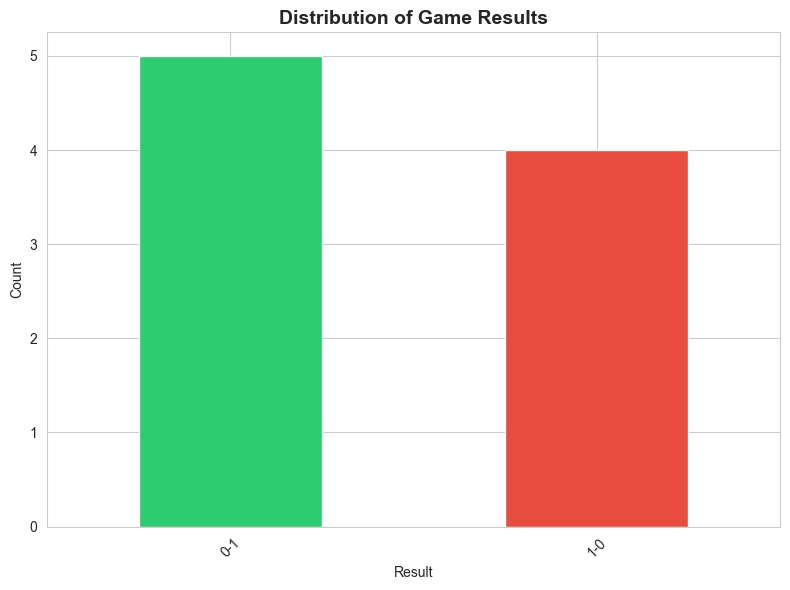

In [32]:
# Visualize game results
if 'Result' in df_meta.columns:
    plt.figure(figsize=(8, 6))
    df_meta['Result'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c', '#95a5a6'])
    plt.title('Distribution of Game Results', fontsize=14, fontweight='bold')
    plt.xlabel('Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

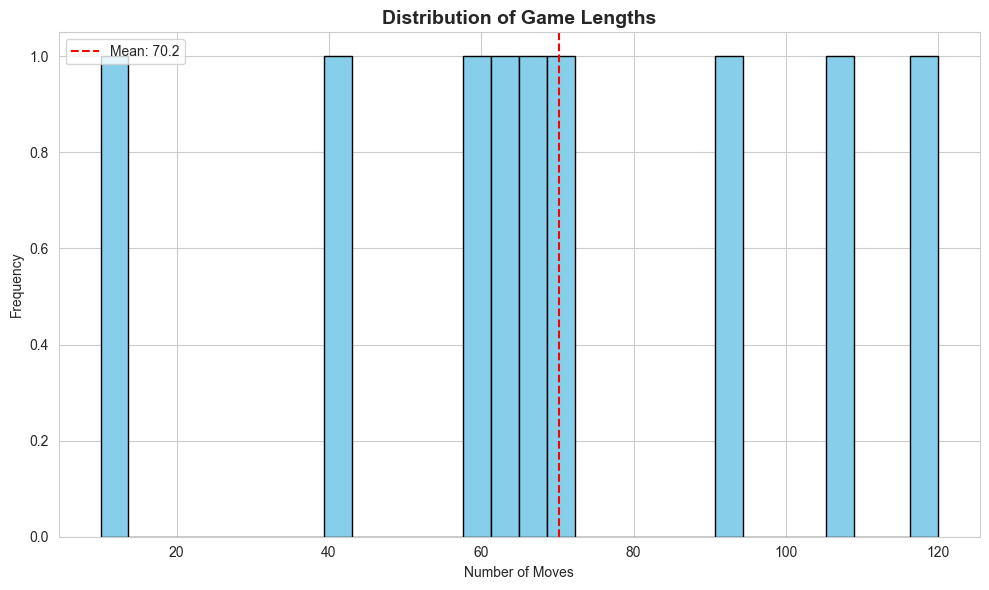

Average game length: 70.2 moves
Shortest game: 10 moves
Longest game: 120 moves


In [33]:
# Analyze game lengths (number of moves)
game_lengths = [len(moves_dict[game_id]) for game_id in moves_dict.keys()]

plt.figure(figsize=(10, 6))
plt.hist(game_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Number of Moves')
plt.ylabel('Frequency')
plt.axvline(x=sum(game_lengths)/len(game_lengths), color='red', linestyle='--', label=f'Mean: {sum(game_lengths)/len(game_lengths):.1f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average game length: {sum(game_lengths)/len(game_lengths):.1f} moves")
print(f"Shortest game: {min(game_lengths)} moves")
print(f"Longest game: {max(game_lengths)} moves")

## 5. Export Data (Optional)

In [34]:
# Uncomment to export metadata to CSV
# metadata.to_csv('../Data/game_metadata.csv')
# print("Metadata exported to CSV")